In [9]:
import colorsys

import matplotlib.pyplot as plt
from matplotlib import legend as mlegend
from matplotlib import ticker as mticker
import pandas as pd
import seaborn as sns
import numpy as np

import dew_gwdata as gd
import wrap_technote as tn

In [10]:
# plt.style.use("ggplot")

In [11]:
%matplotlib inline
plt.rcParams["figure.dpi"] = 150

In [12]:
df = pd.read_excel(
    r"P:\Projects_SW\State\Status Reporting\Prescribed Regions\Barossa\Data\Water Use\2018-19\Barossa_water_use_2018-19.xlsx",
    skiprows=[0],
)

In [13]:
df

,Unnamed: 0,Imported water - BIL,Imported water - SA Water,Licensed Dams,Watercourse,Licensed water extraction (ML),Stock and Domestic Dams,Total Extraction Volume,Total Extraction + Recycled Water,Surface water Extractions,Groundwater Extractions,Streamflow at Yaldara,Resource Volume,% of resource volume extracted,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-year average
1,2004–05,4198,NaN,445.00,1449,1894.000,1100,7192.000,7414.432990,2994.000,2319.000,14837.845,17831.845,0.167902,NaN
2,2005–06,3631,NaN,459.00,1164,1623.000,1100,6354.000,6550.515464,2723.000,1735.000,25431.074,28154.074,0.096718,NaN
3,2006–07,5826,1931,498.00,1544,2042.000,1100,10899.000,11236.082474,3142.000,3733.000,1326.240,4468.240,0.703185,NaN
4,2007–08,4576,1199,433.00,1368,1801.000,1100,8676.000,8944.329897,2901.000,3944.000,2337.939,5238.939,0.553738,NaN
5,2008–09,4760,1753,423.00,1687,2110.000,1100,9723.000,10023.711340,3210.000,3669.000,2567.817,5777.817,0.555573,0.415423
6,2009–10,5070,2005,622.00,1348,1970.000,1100,10145.000,10458.762887,3070.000,2693.000,11227.762,14297.762,0.214719,0.424787
7,2010–11,2540,1410,285.00,994,1279.000,1100,6329.000,6524.742268,2379.000,1261.000,15170.000,17549.000,0.135563,0.432556
8,2011–12,4128,525,461.00,1055,1516.000,1100,7269.000,7493.814433,2616.000,2035.000,8103.000,10719.000,0.244053,0.340729
9,2012–13,7717,1236,586.00,888,1474.000,1100,11527.000,11883.505155,2574.000,3381.000,2178.000,4752.000,0.541667,0.338315


In [14]:
dfc = df.iloc[1:16]
dfc = dfc.rename(columns={"Unnamed: 0": "Year"})

In [15]:
dfc

,Year,Imported water - BIL,Imported water - SA Water,Licensed Dams,Watercourse,Licensed water extraction (ML),Stock and Domestic Dams,Total Extraction Volume,Total Extraction + Recycled Water,Surface water Extractions,Groundwater Extractions,Streamflow at Yaldara,Resource Volume,% of resource volume extracted,Unnamed: 14
1,2004–05,4198,NaN,445.00,1449,1894.000,1100,7192.000,7414.432990,2994.000,2319.000,14837.845,17831.845,0.167902,NaN
2,2005–06,3631,NaN,459.00,1164,1623.000,1100,6354.000,6550.515464,2723.000,1735.000,25431.074,28154.074,0.096718,NaN
3,2006–07,5826,1931,498.00,1544,2042.000,1100,10899.000,11236.082474,3142.000,3733.000,1326.240,4468.240,0.703185,NaN
4,2007–08,4576,1199,433.00,1368,1801.000,1100,8676.000,8944.329897,2901.000,3944.000,2337.939,5238.939,0.553738,NaN
5,2008–09,4760,1753,423.00,1687,2110.000,1100,9723.000,10023.711340,3210.000,3669.000,2567.817,5777.817,0.555573,0.415423
6,2009–10,5070,2005,622.00,1348,1970.000,1100,10145.000,10458.762887,3070.000,2693.000,11227.762,14297.762,0.214719,0.424787
7,2010–11,2540,1410,285.00,994,1279.000,1100,6329.000,6524.742268,2379.000,1261.000,15170.000,17549.000,0.135563,0.432556
8,2011–12,4128,525,461.00,1055,1516.000,1100,7269.000,7493.814433,2616.000,2035.000,8103.000,10719.000,0.244053,0.340729
9,2012–13,7717,1236,586.00,888,1474.000,1100,11527.000,11883.505155,2574.000,3381.000,2178.000,4752.000,0.541667,0.338315
10,2013–14,6481,1946,447.00,943,1390.000,1100,10917.000,11254.639175,2490.000,2781.000,11841.000,14331.000,0.173749,0.26195


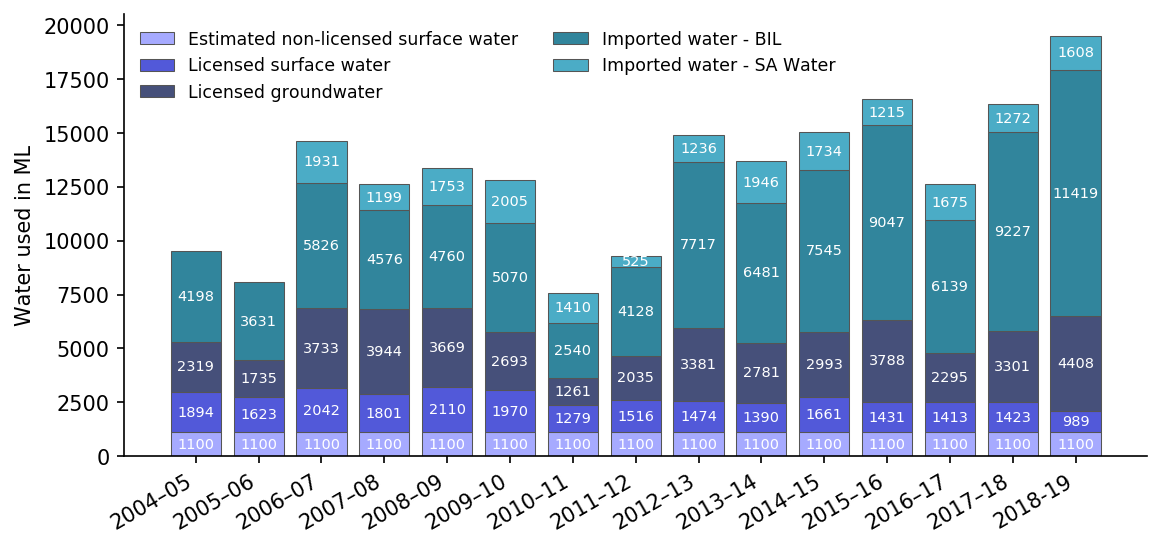

In [17]:
fig = plt.figure(figsize=(8.8, 3.9))
ax = fig.add_subplot(111)
idx = np.arange(len(dfc.Year))
width = 0.8

series_to_plot = {
    "Stock and Domestic Dams": {
        "facecolor": (166 / 255, 170 / 255, 255 / 255, 1),
        "label": "Estimated non-licensed surface water",
    },
    "Licensed water extraction (ML)": {
        "facecolor": (82 / 255, 89 / 255, 217 / 255, 1),
        "label": "Licensed surface water",
    },
    "Groundwater Extractions": {
        "facecolor": (70 / 255, 80 / 255, 122 / 255, 1),
        "label": "Licensed groundwater",
    },
    "Imported water - BIL": {
        "facecolor": (49 / 255, 133 / 255, 156 / 255, 1),
        "label": "Imported water - BIL",
    },
    "Imported water - SA Water": {
        "facecolor": (75 / 255, 172 / 255, 198 / 255, 1),
        "label": "Imported water - SA Water",
    },
}

bottom = np.asarray(idx) * 0.0
for i, (name, props) in enumerate(series_to_plot.items()):
    series = dfc[name]
    ax.bar(
        idx,
        series,
        width,
        bottom=bottom,
        label=props["label"],
        facecolor=props["facecolor"],
        edgecolor="#555555",
        linewidth=0.5,
    )
    for j in idx:
        #         print(f"j {j} bottom[j] {bottom[j]} series[j] {series.iloc[j]}")
        v = series.iloc[j]
        y = bottom[j] + v / 2
        if not np.isnan(v):
            ax.text(
                j,
                y,
                int(v),
                ha="center",
                va="center",
                fontsize="x-small",
                color="white",
            )
    bottom += np.asarray(series.values, dtype="float")
ax.legend(loc="upper left", fontsize="small", frameon=False, ncol=2)
xts = ax.set_xticks(idx)
xtlabels = ax.set_xticklabels(dfc.Year, rotation=30, ha="right")
ax.set_ylabel("Water used in ML")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)